In [1]:
# Setup environment for all following codes
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

# Setup the random seed for reproducibility
import random
random.seed("Genetic Algorithm Applied in UAV's Path-Planning")

# Genetic Algorithm Applied in UAV's Path-Planning


Gustavo de Moura Souza \
_School of Electrical Engineering_ \
_University of Campinas_ \
Campinas, Brazil \
g263234@g.unicamp.br



<h3>Table of Contents<span class="tocSkip"></span></h3>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1">Abstract</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span></li><li><span><a href="#Literature-Review" data-toc-modified-id="Literature-Review-3">Literature Review</a></span></li><li><span><a href="#Problem" data-toc-modified-id="Problem-4">Problem</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-5">Methodology</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-6">Results</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7">Conclusion</a></span></li></ul></div>

## Abstract

The present paper introduces a hybrid genetic algorithm for path planning problem with obstacle avoidance. The genetic algorithm is combined with Ray Casting (RC) algorithm, where RC is responsible to avoid obstacles and to find safe regions
for emergency landing. Thus, the path planning system must deal with a non-convex environment when planning and replanning
trajectories. It must also work embedded on the UAV. The system runs under a Raspberry Pi board and it is evaluated over 50
benchmark maps from literature.

**Keywords** — hybrid method, ray casting, genetic algorithm, path planning, UAV, emergency landing


## Introduction

Unmanned Aerial Vehicle (UAV) is an aircraft that does not carry a human operator, and it can be piloted remotely or even fly autonomously [1]. There is a broad interest in the development of better, faster and more useful UAV systems. These systems are being used in a series of applications such as field recognizance, agricultural surveying, disaster assistance, law enforcement and others [2].

However, the development of UAV systems is still complex
and requires more practical and theoretical experience to
mature the UVA’s flights safe. Regulatory laws regarding the
safe use of UAV are being defined in many countries, usually
following standards from international organizations such as
the Federal Aviation Administration (FAA), United States; the
Civil Aviation Safety Authority (CASA), Australia and the
European Aviation Safety Agency (EASA), Europe Union [3].
These rules define patterns for a safe flight and how to achieve
it regarding the safety of people and the environment.

Autonomous control systems use techniques from the field
of Artificial Intelligence (AI) to achieve autonomy [4], and it is
a relevant tool to mitigate problems for complex systems such
as those embedded in UAVs. An autonomous UAV system
can sometimes fly safer, execute tasks quicker and preciser
than operated by human pilots. For many UAV applications,
its remote operation by human pilots can be either expensive
or impracticable [5].

The automation can be divided into three main categories:
(i) not autonomous - the UAV system needs to be operated
by a human and does not perform any movement actions by
itself; (ii) semi-autonomous - the system has some elements
that facilitate the flight, such as stabilizers, autopilots and
previously coded actions (e.g., return to land); (iii) autonomous - the system can complete a given mission without human
interference.

The present paper introduces a solution to make the UAV
system get to the third level of automation when planning a
path. This research mainly investigates a couple of ways to
address the path planning problem with risk allocation and
obstacle avoidance, while taking care of optimizing the fuel
consumption and other resources. Two main constraints are
handled. First, the system must work within a non-convex
environment, which means to deal with obstacle avoidance.
Second, the system must work embedded in the UAV that
leads to online path planning and replanning.

In this scenario, we introduce a hybrid evolutionary algorithm integrating a Genetic Algorithm (GA) to Ray Casting
(RC) algorithm [6] for obstacle avoidance. RC allows solving
problems in 3D computer graphics and computational geometry using ray-surface intersection tests. The proposed method
is evaluated by running under a Raspberry Pi board to planning
paths for a set of benchmark maps introduced in [7].

The present paper is organized as follows: Section II describes some related work, and Section III states the problem
approached. The hybrid evolutionary algorithm is explained
in Section IV, and the experimental results are reported in
Section V. The conclusions follow in Section VI

## Literature Review

Mission and path planning approaches are described by
[8]–[11]. A planning system is described in [8] for discrete
actions and continuous controls being executed by aerial and
underwater vehicles. The planner provides autonomy by giving
the system a decision-making module that uses a compact
representation for all the feasible plans. It also presents a
mathematical formulation to define the set of actions that can
be taken by autonomous vehicles.

The problem approached by this paper is based on a similar
one described in [9], named as Chance-Constrained Optimal
Path Planning with Obstacles. The problem is formulated
using stochastic models to describe the chance-constraints for
risk allocation when planning the trajectories. Mathematical
programming based heuristics are proposed that return paths
based on upper and lower bound solutions from the stochastic
model.

The authors in [10] extend the chance-constrained approach
to continuous time where the risk is bounded from the reflection principle since the trajectory follows a Brownian motion.
A Mixed-Integer Linear Programming (MILP) formulation is
proposed in [11] for the same problem, which was able to
solve more complex maps within a reduced computational time
using an exact method.

The evolutionary algorithms have been applied to solve
path planning problems, as described in [12]–[15]. A hybrid
method combining genetic algorithms with Voronoi diagrams
is introduced by [12], where the Voronoi approach helps to
create the GA population aiming to improve the overall quality
of solutions. GA is applied in [13] for path planning of mobile
robots with obstacle avoidance.

A hybrid algorithm is proposed in [14] that combines
Ant Colony Optimization (ACO) and GA for path planning
in mobile robots with obstacle avoidance. ACO returns an
initial trajectory which is improved by GA. The aircraft in
[15] must avoid no-fly zones, radars zones, missiles, and
anti-aircraft guns. A three-dimensional scenario is assumed,
and a Differential Evolution (DE) method is proposed for
path planning. The robustness and convergence speed of DE
outperforms 11 other algorithms from the literature.

A hybrid method combines a multi-population genetic algorithm with the resolution of a linear programming model in
[16]. A non-convex environment with uncertainties is assumed,
and a visibility graph helps to encode all possible paths as
individuals. A linear programming model is solved from such
encoding, and the solution achieved will define the fitness of
the individual as well as a possible path to be executed.
The path replanning problem for UAVs, under an emergency
landing, is approached by [17]. The authors proposed three
path planning methods: a greedy heuristic, a simple genetic
algorithm, and a multi-population genetic algorithm. The
greedy heuristic stands for fast feasible paths, while the genetic
algorithms return better quality trajectories.

The Ray Casting technique used in this research was proposed by [18] for solids modelling systems. The complex
solids are modelled by combining simpler solids, such as
cylinders and pyramids, that receive a virtual light ray cast at
their surface. RC is a reliable and extensible method presenting
a high-grade performance in terms of execution time and is
easily adapted to other scenarios. The authors in [19] apply RC
as an acceleration technique for Graphical Processing Units
(GPU), interpreting the solids as volume described by ray
casting instead of object-order units. This work influenced the
use of RC to render 3D meshes in movies, games and scientific
visualization softwares.

RC is applied for machine-tools in [20] to demonstrate the
effectiveness of using graphics hardware on manufacturing
problems. A NASA research presented in [6] a path planner for
UAV systems using RC to detect and avoid obstacles, taking
into account the safety of the mission. The planning algorithm
also used a rapidly exploring random tree to find a suitable
path.

The present paper introduces a hybrid evolutionary algorithm to deal with the path planning with obstacles approached
by [9]–[11], [16], but without handling the chance-constraint
with risk allocation. Also, we apply the hybrid evolutionary
algorithm for path planning as well as for path replanning
under emergency landing. It is a different approach from
[5], [16]. The path planning in [16] needs to solve a linear
programming model, which can be difficult for a planning
system embedded on the UAV as the one proposed here.
The emergency path planners in [5] deal with risk allocation,
and they are tailor-made for emergency landing, while our
approach is less specific, but it can easily switch from path
planning to emergency landing.


## Problem

The path planning problem with obstacles approached in this paper will optimize trajectories where the hard constraint is the obstacle avoidance. Thus, we must avoid the risk to hit a no-fly zone, which is represented by obstacles or regions where the UAV is not allowed to go through.  The optimization criterion is usually to reach the destination, where some soft constraints can also be satisfied, such as running a short trajectory, saving fuel or applying smooth manoeuvres. The problem is non-convex since the trajectory must avoid the no-fly zones through the path planning map. 
Figure 1 give us an example where the UAV must reach the goal point *End* from the start point *Begin*, avoiding collision with obstacles A and B.  

<img src="images/problem.png">
Fig. 1. Path Planning problem illustration.

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=1\columnwidth]{images/problem}\\
    %{\color{gray}{\hfill\tiny  Source: Author's illustration}}
    \caption{Path Planning problem illustration.}
    \label{fig:problem}
\end{figure}"

We will also handle the emergency landing situation, where a path replanning must be executed over a stay-in region (landing area). Figure 2 gives us an example where the UAV must reach the goal point *End* from the start point *Begin*, avoiding collision with obstacles A and B, but when a situation happens, an emergency landing is executed over region C, recalculating the route to safely land.  

<img src="images/problem_emergency.png">
Fig. 2. Path Replanning problem illustration.

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=1\columnwidth]{images/problem_emergency}\\
    %{\color{gray}{\hfill\tiny  Source: Author's illustration}}
    \caption{Path Replanning problem illustration.}
    \label{fig:problem2}
\end{figure}"

To sum up, the problem assumes the UAV must plan a trajectory to reach a destination, avoiding obstacles and optimizing some criterion. Also, if a situation happens, a path replanning is executed to reach a stay-in area. The stay-out (no-fly zones) and stay-in (landing areas) are previously known by the autonomous path planning system.



### Problem Description

A mathematical formulation for the path planning problem is presented next based on the formulation described in [9].

\begin{equation}
    \text{Minimize}~~ \Theta () = \sum_t \left\Vert u_t\right\Vert
    \label{problem:obj}
\end{equation}

Where:

\begin{equation}
    x_T = x_{goal}
    \label{problem:obj4.2}
\end{equation}

\begin{equation}
    x_{t+1} = Ax_t + B_{u_t} + \mu_t \text{,\;~} \forall(t)
    \label{problem:obj4.3}
\end{equation}

\begin{equation}
    x_t \in \mathbb{I}_j \Leftrightarrow \bigwedge\limits_{i\in H_j^\mathbb{I}} h_i^T x_t \leq g_i
    \label{problem:obj4.6}
\end{equation}

\begin{equation}
    x_t \in \mathbb{O}_j \Leftrightarrow \bigvee\limits_{i\in H_j^\mathbb{O}} h_i^T x_t \geq g_i
    \label{problem:obj4.7}
\end{equation}


The objective function \eqref{problem:obj} will minimize some metric related to the mission planning such as distance, fuel consumption, collision risk, among others. The authors in [9] define the objective function as a cost proportional to the applied controllers magnitude. In the objective function \eqref{problem:obj},  $u_t$ can be the acceleration applied at each time step $t$ within the planning horizon $t=1,...,T$.

The Constraint \ref{problem:obj4.2} defines that the last state of the UAV  must be the state defined by $x_{goal}$. The state variable $x_t$ can be represented, e.g., by the position and velocity of the UAV at time step $t$.  The state transitions are defined recursively by Constraints \ref{problem:obj4.3}. 


The Constraints \ref{problem:obj4.6} and \ref{problem:obj4.7} describe stay-in and stay-out states in which $i \in H_j$ is the hyperplane  that defines the convex regions for obstacles or landing regions. The obstacles are defined as the disjunction of linear constraints where the UAV must stay outside of one hyperplane at least, otherwise we have a collision. The landing regions are established as the junction of linear constraints where the UAV must stay-in during the path planning.


## Methodology


### Hybrid Genetic Algorithm

 The Genetic Algorithm receives as input an object that defines the mission the UAV must complete. The object contains one or more no-fly areas $({\Phi_n}_i)$, an origin $(\omega_o)$ and a destination $(\omega_d)$ waypoint, all of them defined in the Cartesian system. The output is the Cartesian waypoints of the best route evolved. In this project, the best individual is abstracted as the best route. The hybridization aspect arises when the Ray Casting algorithm is applied to detect no-fly regions as well as landing areas. This happens during the fitness calculation.
%The genetic algorithm performs an optimization on the fitness function \eqref{eq:fitness} which is the problem's objective function \eqref{problem:obj} that needs to be minimized. 
The pseudo-code (Algorithm 1) describes our algorithm.

<img src="images/algorithm1.png">
Algorithm 1: Hybrid Genetic Algorithm

[\\]: "\begin{algorithm}[!htb]
     \DontPrintSemicolon
     \label{alg:ga}
      \KwIn{Criteria: stop\_criteria; Int: crossover\_rate, population\_size; Map: map}
     \KwOut{Route: best\_route}
     %population $\leftarrow$ Genesis()\\
     \While{not stop\_criteria}{
        Initialize\_Routes(population)\\
        Evaluate\_Fitness(population, map)\\
         \Repeat{not converge}{
             \For{i=1 to crossover\_rate x population\_size}{
                 parents $\leftarrow$ Tournament(population)\\
                 offspring $\leftarrow$ Crossover(parents)\\
                 Mutation(offspring)\\
                 Evaluate\_Fitness(offspring)\\
                 Insert(offspring)\\
             }
         }
     }
     \Return best\_route
     \newline
  \caption{Hybrid Genetic Algorithm}
 \end{algorithm}"

The stop criterion in our computation experiments is the execution time. The selection for reproduction,  crossover and mutation operators are executed while there is no convergence. A new individual is inserted if it has better fitness value than one of its parents. The method converges when no new individuals are inserted in the population, after a total of $crossover\_rate \times population\_size$ individuals has been created. In this case, all individuals are reinitialized, except by the best one. 


### Individual

The solution encoding of the GA has the controllers that a UAV needs to perform a trajectory. Thus, the individual is described as a set of values applied to change the  UAV position from one time step to another. The decoding of such individual will return the set of states $\left[x_t, y_t, v_t, \alpha_t\right]$ of the aircraft through the time steps $t$. 

Let $T$ be the planning horizon size that has the quantity of time steps or waypoints that is desired to compute. The individual is defined  for $t = 1, \ldots T$ as follow:

\begin{equation*}
    \begin{aligned}
        DNA &= [ gene_1,gene_2,\ldots,gene_t,\ldots,gene_T ] \\
        gene_t &= (a_t, e_t)
    \end{aligned}
\end{equation*}

where:
- a := UAV's acceleration (meters/second$^2$)
- e := UAV's angle (degrees)

[\\]: "\begin{itemize}
    \item [$a$] := UAV's acceleration (meters/second$^2$)
    \item [$e$] := UAV's angle (degrees)
\end{itemize}"

This representation of individual allows the route to move forward with increasing and decreasing velocity and changing angle freedom, constrained by the UAV design. The individual represents the movement in a vectored form. To imply the Cartesian position where this vector leads, it is needed to decode each of the individual's gene. Define $\gamma DNA$ the set of UAV controllers, i.e. the decoded DNA, for $t = 1, \ldots T$: 
\begin{equation*}
    \begin{aligned}
        \gamma DNA &= [ \gamma gene_1, \ldots \gamma gene_T]\\
        \gamma gene_t &= (x_t, y_t, v_t, \alpha_t)
    \end{aligned}
\end{equation*}

where:
- $x_t$ := UAV's position on the X axis (meters)
- $y_t$ := UAV's position on the Y axis (meters)
- $v_t$ := Horizontal UAV's velocity (meters/second)
- $\alpha_t$ := Horizontal UAV's angle (direction) (degrees)

[\\]: "\begin{itemize}
    \item [$x_t$] := UAV's position on the X axis (meters)
    \item [$y_t$] := UAV's position on the Y axis (meters)
    \item [$v_t$] := Horizontal UAV's velocity (meters/second)
    \item [$\alpha_t$] := Horizontal UAV's angle (direction) (degrees)
\end{itemize}"


Figure \ref{fig:individual_dna} illustrates the individual encode and decoding representation.

<img src="images/individual_dna.png">
Figure 3: Individual's encoding and decoding

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=1.0\columnwidth]{images/individual_dna}
    \caption{Individual's encoding and decoding}
    \label{fig:individual_dna}
\end{figure}"



To decode each gene and generate the $\gamma DNA$ with $\gamma gene$s, it is applied the function \ref{eq:decode}. It transforms the vectors describing the acceleration and angle to a new interpretation, which represents the $x$ and $y$ coordinates, the velocity and the horizontal angle. Thus, $DNA$ represents transitions, and the decoded $\gamma DNA$ represents states. Let $\Gamma$ be the function that decodes a gene:

\begin{equation}
    \Gamma(gene) = 
    \begin{cases}
        x_{t+1} & = x_t + v_t \cdot \cos(\alpha_t) \cdot \Delta T \\
        &+ a_t \cdot \cos{(\alpha_t)} \cdot \frac{\Delta T^2}{2}\\
        y_{t+1} & = y_t + v_t \cdot \sin(\alpha_t) \cdot \Delta T\\
        &+ a_t \cdot \sin{(\alpha_t)} \cdot \frac{\Delta T^2}{2}\\
        v_{t+1} & = v_t + a \cdot \Delta T - \frac{F \cdot \Delta T}{m}\\
        \alpha_{t+1} & = \alpha + e \cdot \Delta T
    \end{cases}
    \label{eq:decode}
\end{equation}


Where $\Delta T$ is time variation between two consecutive time steps.
The $F$ term is the drag equation\footnote{This particular equation was obtained from \cite{jesimar}}, defined by Equation \ref{eq:F}, that is used to estimate better the position and the movement of the UAV on the air. 

\begin{equation}
    F = 0.5 \cdot Cd \cdot \rho \cdot A \cdot v_t^2
    \label{eq:F}
\end{equation}

The drag equation allows to determine the strength that an object is subjected to when passing through a fluid (In this case, the fluid is the air.). The constants $Cd$ (The drag coefficient considered was the same for an *angled cube*, which is $0.8$.), $\rho$ (The specific fluid mass, a.k.a. density, used was $1.225$ given in k/m$^3$.) and $A$ (Area of reference.) are defined according to the UAV's and environment's conditions.


### Fitness

\begin{equation}
    \begin{aligned}
    fitness =
    &~C_{dist} \cdot f_{dist} + C_{obs} \cdot f_{obs} \\
    &+  C_{curv} \cdot f_{curv} +  C_{cons} \cdot f_{cons} \\
    &+  C_{T} \cdot f_{T}
    \end{aligned}
    \label{eq:fitness}
\end{equation}

The first term penalizes the distance from the last waypoint to the destination one. This is done  by calculating the Euclidean distance between those two points in Equation  \ref{eq:fit:dist}. If the distance is less than a threshold $\epsilon$, it is set zero.
\begin{equation}
    f_{dist} = \sqrt{{(\omega_d^x - \gamma gene_T^x)}^2 + {(\omega_d^y - \gamma gene_T^y)}^2}
    \label{eq:fit:dist}
\end{equation}

The second term penalizes the flight over no-fly zones. In this case, the Ray Casting algorithm is applied to detect such constraint violation. Let $\omega_i$ be the waypoint described by $(\gamma gene_i^x, \gamma gene_i^y)$. Let $\overline{\omega_i,\omega_j}$ be the segment that connects two waypoints: $\omega_i$ and $\omega_j$. The Equation \ref{eq:fit:obs} describes the obstacle fitness function (When t=T, set t+1=0):

\begin{equation}
    f_{obs} = 
    \begin{cases}
        &\sum_{t=0}^{T} \sum_{n=0}^{N} RC_P(\omega_t, \Phi_n) \\
        &+ RC_S(\omega_t, \omega_{t+1}, \Phi_n)
    \end{cases}
    \label{eq:fit:obs}
\end{equation}
\begin{equation}
    RC_P(\omega, \Phi) = 
    \begin{cases}
        1 & \text{, if } \omega \in \Phi\\
        0 & \text{, otherwise}
    \end{cases}
    \label{eq:fit:RC_P}
\end{equation}
\begin{equation}
    RC_S(\omega_i, \omega_j, \Phi) = \sum_{n=0}^{N} \lvert \overline{\omega_i,\omega_j} \bigcap \Phi_n \rvert
    \label{eq:fit:RC_S}
\end{equation}

The Equations \ref{eq:fit:RC_P} and \ref{eq:fit:RC_S} describes the results from the Ray Casting algorithm that are further explained in the next subsection. The Equation \ref{eq:fit:RC_P} evaluates those waypoints inside obstacles, while Equation \ref{eq:fit:RC_S} finds the segments that go through some obstacle or no-fly zones.
Equation \ref{eq:fit:curv}  indicates the third term of the fitness function, which penalizes routes with lots of curves by summing up the angle between each segment of the route. 
\begin{equation}
    f_{curv} = \dfrac{1}{e_{max}} \cdot \sum_{t=0}^{T} {gene_t^e} 
    \label{eq:fit:curv}
\end{equation}

Straighter routes can be simplified by transforming three or more collinear waypoints into two, that way, the information passed to the autopilot is reduced, decreasing the chance of future communication problems with the UAV. Due to that, smoother routes are rewarded. The fourth fitness term is given by Equation \ref{eq:fit:cons}, and it takes into account the fuel consumption. 

\begin{equation}
    f_{cons} = \sum_{t=0}^{T} {gene_t^a}^2 
    \label{eq:fit:cons}
\end{equation}

To simplify the introduction of fuel consumption on the fitness function, it is interpreted as the total route's sum of squared accelerations. Longer the route, more significant the fitness. This forces the algorithm to find the shortest route, saving fuel and completing the mission faster.

We are not assuming a fixed number of time steps $T$ for the trajectory. The proposed GA will optimize the number of time steps. This is done by including on the fitness function the $T$ parameter. Thus, the Equation \ref{eq:fit:T}  counts the number of time steps on the individual's encoding.  

\begin{equation}
    f_{T} = \overline{T} 
    \label{eq:fit:T}
\end{equation}

The total values of the fitness function must be minimized, which means that the better individuals will have a reduced fitness value. However, if an emergency landing becomes necessary, Equation \ref{eq:fit:dist} is replaced by Equation \ref{eq:fit:land}.
\begin{equation}
    f_{landing} = 
    \begin{cases}
        &\sum_{n=0}^{N} RC_L(\omega_{\overline{T}}, \Psi_n)
    \end{cases}
    \label{eq:fit:land}
\end{equation}

\begin{equation}
    RC_L(\omega, \Psi) = 
    \begin{cases}
        1 & \text{, if } \omega \in \Psi\\
        0 & \text{, otherwise}
    \end{cases}
    \label{eq:fit:RC_L}
\end{equation}

Where $\Psi$ represents a stay-in (landing) area and the last time step $\overline{T}$ must be within some $\Psi$.

%Expansion to bonification and penalization areas, expanding the fitness function and redefining the problem to consider those areas as part of the minimization problem. 

### Operators

The initialization operator generates individuals following two steps. First, the number of time steps $\overline{T}$ is randomly selected from $\{1,\ldots,T\}$. Moreover, individuals with different number of time steps can be created. Second, the pair of values $gene_t=\left(a_t,e_t\right)$ for each gene is randomly taken with $a_t\in[a_{min},a_{max}]$ and $e_t\in[e_{min},e_{max}]$. 

The selection operator for reproduction is the Tournament \cite{miller1995genetic} with size two. Thus, it is randomly selected two individuals from the population, and the best one is chosen as the first parent. The second parent is selected following the same steps.

The new individual is generated by randomly choosing between OX and BLX-$\alpha$ crossover operators for the two parents.
These operators are applied as follows:

- OX: The offspring genes are randomly selected between $parent_1$'s or $parent_2$'s gene;
- BLX-$\alpha$: It is taken the medium for each of $parent_1$'s and $parent_2$'s gene's elements and modified by a small value.

[\\]: "\begin{itemize}
    \item \textbf{OX}: The offspring genes are randomly selected between $parent_1$'s or $parent_2$'s gene;
    \item \textbf{BLX-$\alpha$}: It is taken the medium for each of $parent_1$'s and $parent_2$'s gene's elements and modified by a small value.
\end{itemize}"

The mutation operator is performed over each of the new genes with a probability $Pr(\text{mutation})$ of mutating or not the gene. There were defined four operators that perform mutation. Each operator is randomly selected with equal chance.

- Creep: It is added or subtracted a small random value from each gene's element;
- Change: Each gene has a probability of 50\% of being replaced by a random generated new gene;
- Insert: It is inserted a single randomly generated gene anywhere on the DNA, if after muting $T \leq T_{max}$;
- Remove: A random gene is removed from the DNA, if after muting $T \geq T_{min}$.
    
[\\]: "\begin{itemize}
    \item \textbf{Creep}: It is added or subtracted a small random value from each gene's element;
    \item \textbf{Change}: Each gene has a probability of 50\% of being replaced by a random generated new gene;
    \item \textbf{Insert}: It is inserted a single randomly generated gene anywhere on the DNA, if after muting $T \leq T_{max}$;
    \item \textbf{Remove}: A random gene is removed from the DNA, if after muting $T \geq T_{min}$.
\end{itemize}"



### Ray Casting

The Ray Casting algorithm is applied during the fitness calculation to identify obstacles in Equation \ref{eq:fit:obs} or landing areas in Equation \ref{eq:fit:land}. As previously mentioned, this algorithm is widely used in computer graphics field, especially for rendering 3D scenes for games and animation movies. 

RC simulates the path a light ray makes when inserted on an environment, by calculating the trajectory of the ray from the light source until it reaches an object. Further developments on the Ray Casting simulated the reflex of objects and the projection of new rays. Given a 2D polygon and a point, a ray is cast from the point to the infinite. If this ray crosses an even number of the polygon's edge, the point is outside the polygon, if it crossed an odd number, then it is inside the polygon.

For the path planning problem, the Ray Casting algorithm is employed here to avoid collision with a no-fly area. This is done by casting horizontal rays from each waypoint of the route. Next, it is calculated how many times the ray cast intercepted the polygon formed by the area. If the ray intercepted the area an odd number, the waypoint is inside the area, if it intercepted an even number, then the waypoint is outside of the area.

The Ray Casting algorithm implemented in this work consists of a two-fold algorithm. The first one, the *Point in Polygon* RC is used to check if a given polygon contains a point. This algorithm is employed by Equation \ref{eq:fit:RC_P} and it uses the logic of casting a horizontal ray in the direction of the positive axis (i.e. to the right on Cartesian) and counts the number of areas edges intersections, establishing if it is inside or not the area. The *Point in Polygon* RC is used to check for every waypoint of the route the relational position colliding with any obstacle.

The second RC is the *Segment intersects Segment*. This algorithm is important because the notion of waypoints is only an abstraction for the UAV's controller to trace a motion vector that drives the airship along some path. Due to that, it is not only necessary to check if the waypoints are colliding with obstacles but to check if any part of the UAV's route is colliding.

It works by checking the orientation of each segment of the route with each edge of the no-fly areas. For a pair of following waypoints belonging to the route, a ray is cast between them, i.e. a connection. It is then checked with the area's edges. If the orientation of the points indicates both segments intersect between themselves, the route is then penalized. Otherwise, the route does not receive a penalty when the segments are not intersecting. This is described by Equation \ref{eq:fit:RC_S}.

Equation \ref{eq:fit:RC_L} is also related to the *Point in Polygon* RC. The goal of this equation is to check if the route's last waypoint, the landing point, arrived at a safe zone  or not, allowing the UAV to safely land. To verify if the point is contained inside the polygon formed by the safe zone, the Ray Casting algorithm is applied as described for the *Point in Polygon* RC.

As the Ray Casting algorithm is not widely used for path planning and geophysical methods, a previous evaluation of the proposed algorithms was necessary. It was made a stress test over the algorithms, executing many cases and inspecting the results. First, the evaluation of checking if a given waypoint is inside a polygon used the algorithm *Point in Polygon*. The process selected a thousand points $\omega$ and assigned to them uniformly distributed values for its $x$ and $y$ coordinates, where the Equation \ref{eq:res:pip} describes the process of selecting the coordinates.

\begin{equation}
    \omega_i = \{x,y\},~~ x \in U[1,6] ~~\text{and}~~  y \in U[1,6] ~~~~ \forall i \in [1,1000]
    \label{eq:res:pip}
\end{equation}

The generated points were inferred to see if they were inside a defined no-fly area. Figure \ref{fig:rc_pip} shows the results of the algorithm, where each cross represents a waypoint, and the square on the centre is the non-navigable area. The label "T" stands for *True* along with the colour green, i.e. the point is **inside** the polygon. The label "F" stands for *False* along with the colour purple, indicating that the point is **outside** the area. The result shows that for every point tested the classification is right.

<img src="images/rc_pip.png">
Figure 3: Stress test for the Point in Polygon Ray Casting Algorithm.

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=0.7\columnwidth]{images/rc_pip}\\
    \caption{Stress test for the \emph{Point in Polygon} Ray Casting Algorithm.}
    \label{fig:rc_pip}
\end{figure}"

In [2]:
%%time
# Code to run the stress test for the Point in Polygon Ray Casting Algorithm

import random

from src.naboo.model import CartesianPoint
from src.naboo.utils import point_in_polygon
from src.naboo.visualization import plot_map

# Defines the quantity of points
qty_points = 1000

# Define the vertex of the obstacle
verts1 = [
    (2.5, 2.5), # left, bottom
    (2.5, 4.5), # left, top
    (4.5, 4.5), # right, top
    (4.5, 2.5), # right, bottom
]
verts1.append(verts1[0])
verts1 = [CartesianPoint(v[0], v[1]) for v in verts1]

texts = []
wps = []
for i in range(qty_points):
    x = random.uniform(1,6)
    y = random.uniform(1,6)
    
    wp = CartesianPoint(x,y)
    wps.append(wp)
    texts.append(str(point_in_polygon(wp, verts1))[0])
    
plot_map(
    areas=[verts1], 
    labels=['n'], 
    texts=texts,
    points=wps,
    wp_style='x',
    title='Ray Casting Algorithm - Point in Polygon Stress Test, wp={}'.format(qty_points),
    stress=True
)

<Figure size 800x800 with 1 Axes>

Wall time: 6.35 s



The second algorithm needed for the obstacle collision detection considers the intersections between the area's edges and the segment connecting two waypoints, it is called the *Segment Intersects Segment* Ray Casting algorithm. The stress test for this algorithm  followed the same steps as the *Point in Polygon*, although this time the process of selecting the coordinates is expressed on Equation \ref{eq:res:sis}.

\begin{equation}
    \begin{aligned}
        \overline{\omega_a\omega_b}_i &:= \text{line segment connecting}~\omega_a~\text{with}~\omega_b,~\forall i \in [1,15]\\
        \omega &= \{x,y\},~~ x,y \in U[1,6]
        \label{eq:res:sis}
        \end{aligned}
\end{equation}

The results are displayed by Figure \ref{fig:rc_sis}, showing the algorithm performs as expected. The green lines represent the classification as *True*, i.e. the segment $\overline{\omega_a\omega_b}_i$ intersects at least one edge of the polygon. The purple lines represent the *False* label. An interesting note about this execution is that the segment F4 (F stands for *False* and the number is an identifier) is **inside** the polygon and does not cross any edges. It occurs as expected since the algorithm is built to detect intersections only. There is no problem this segment not being penalized by this algorithm because, when running the **Point in Polygon** RC, the algorithm will find the two waypoints inside the area, penalizing them.

<img src="images/rc_sis.png">
Figure 4: Stress test for the Segment intersects Segment Ray Casting Algorithm

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=0.7\columnwidth]{images/rc_sis}\\
\caption{Stress test for the \emph{Segment intersects Segment} Ray Casting Algorithm}
    \label{fig:rc_sis}
\end{figure}"


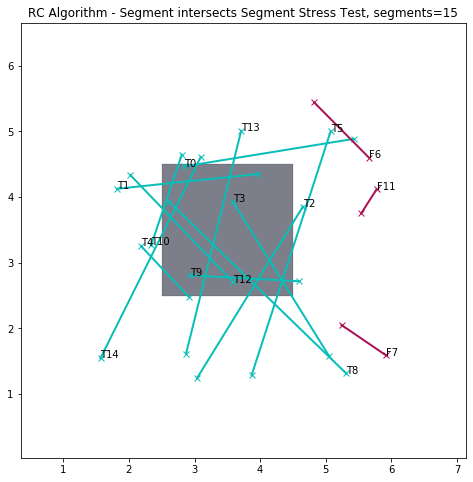

Wall time: 285 ms


In [3]:
%%time
# Code to run the stress test for the Segment intersects Segment Ray Casting Algorithm

import random

from src.naboo.model import CartesianPoint
from src.naboo.utils import segment_in_polygon
from src.naboo.visualization import plot_map

# Define the quantity of segments
qty_segments = 15

# Define the vertex of the obstacle
verts1 = [
    (2.5, 2.5), # left, bottom
    (2.5, 4.5), # left, top
    (4.5, 4.5), # right, top
    (4.5, 2.5), # right, bottom
]
verts1.append(verts1[0])
verts1 = [CartesianPoint(v[0], v[1]) for v in verts1]

texts = []
segments = []
for i in range(qty_segments):
    x = random.uniform(1,6)
    y = random.uniform(1,6)
    wp1 = CartesianPoint(x,y)

    x = random.uniform(1,6)
    y = random.uniform(1,6)
    wp2 = CartesianPoint(x,y)

    segment = [wp1, wp2]
    segments.append(segment)
    texts.append(str(segment_in_polygon(wp1, wp2, verts1))[0])
    
plot_map(
    areas=[verts1], 
    labels=['n'], 
    texts=texts,
    segments=segments,
    wp_style='-x',
    title='RC Algorithm - Segment intersects Segment Stress Test, segments={}'.format(qty_segments),
    stress=True
)

## Results

### Genetic Algorithm for Mission

The proposed path planning is expected to be resilient to a variety of environments, aiming to perform well in real-world scenarios. The testing of such resilience is made by simulating 50 different random generated maps proposed by \cite{Arantes2016}. Each map contained 20 quadrilateral no-fly areas, randomly assembled. Intersection of those areas were allowed. For all maps, the origin and destination waypoints were the same, being the points $(0,0)$ and $(-10,0)$, respectively. 

The algorithms were tested simulating the real environment, which is embedded on a UAV. The tests were executed on a Raspberry PI model B running Linux Ubuntu operating system, with 1.2GHz Quad-Core processor and 1GB of RAM, this device is well suited to fit a UAV. All algorithms and systems for those tests were written in Python. The use of a Raspberry PI is taken into consideration in this work due to its capability of being well suited for an embedded environment and to its computational power capable of running a vast suite of softwares for controlling the UAV and the proposed algorithms.

The fitness function contains a set of parameters that influences the algorithm's performance. Three different sets of parameters were tested to verify the performance of the algorithms over the maps. The parameters for the tests execution are presented on Table \ref{table:parameters_mission}.


[\\]: "\begin{table}[!htb]
\centering
\caption{Parameters used on testing}
\label{table:parameters_mission}
\resizebox{\columnwidth}{!}{%
\begin{tabular}{@{}lllll@{}}
\toprule
\textbf{Parameter} & \textbf{Notation} & \textbf{Mode A} & \textbf{Mode C} & \textbf{Mode F} \\ \midrule
Destination Cost   & $C_{dist}$      & 10000           & 100             & 100             \\
Obstacle Cost      & $C_{obs}$       & 10000           & 1000            & 1000            \\
Consumption Cost   & $C_{con}$       & 500             & 0               & 10              \\
Curvature Cost     & $C_{cur}$       & 100             & 0               & 10              \\
DNA length Cost    & $C_{t}$         & 100             & 10              & 10
\end{tabular}%
}
\end{table}"



The stop criterion is the time limit of  180 sec to find the best trajectory for each map. To evaluate the solutions obtained,  two labels were created. The label "Feasible" represents routes that arrive to the destination within less than 2 meters of radius from destination point, and they do not hit any obstacles. Otherwise, the label "Infeasible" is applied. This one can be subdivided in two categories: one that represents routes that hit an obstacle (infeasibility by obstacle) and one where the last waypoint is too far from the destination (infeasibility by distance).

[\\]: "\begin{table}[!tb]
\centering
\caption{Results of mission simulation. Percentage of maps with the best individual in each label category.}
\label{table:results_mission}
\resizebox{\columnwidth}{!}{%
\begin{tabular}{llll}
\hline
\textbf{Label}         & \textbf{Mode A} & \textbf{Mode C} & \textbf{Mode F} \\ \hline
Feasible               & 74\%            & 92\             & 64\%            \\
Infeasible by Distance & 26\%            & 8\%             & 36\%            \\
Infeasible by Obstacle & 0\%             & 0\%             & 0\%              
\end{tabular}%
}
\end{table}"

Table \ref{table:results_mission} shows the percentage of maps that its best individual completed the task successfully. \emph{Mode C} parameters provided the best results, with 92\% of best individuals being feasible and possible to be applied to the real-world.

It is relevant to highlight that neither configuration modes got routes infeasible by obstacle, which means that none best solution hit any obstacle. Further analysis of the results provided by the best parameter set mode (C) were made. Figure \ref{fig:feasible_over_time_mode_c} shows, for each time step of one second, the cumulative summation of feasible individuals generated.

<img src="images/feasible_over_time_mode_C_alt.png">
Figure: Cumulative summation of feasible individuals for Mode C, showing the average, min and max values over execution time. The blue line represents the average value for each time step, the upper bound of the region represents the maximum values encountered, and the lower represents the minimum values.

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=0.8\columnwidth]{images/feasible_over_time_mode_C_alt.png}\\
%{\color{gray}{\hfill\tiny  Source: Provided by the author}}
    \caption{Cumulative summation of feasible individuals for Mode C, showing the average, min and max values over execution time. The blue line represents the average value for each time step, the upper bound of the region represents the maximum values encountered, and the lower represents the minimum values.}
    \label{fig:feasible_over_time_mode_c}
\end{figure}"

 Those values are obtained by averaging individuals spawning along the 50 maps. It can be seen that feasible routes appear early in the execution, indicating the applicability in real-time planning.

An interesting point to notice is that when the execution took much time, i.e., the algorithm iterated over many generations, the last waypoint of the route $\omega_T$ did not hit exactly the destination point $\omega_d$. The $\omega_T$ stays the furthest it can, respecting the delimited precision restriction and minimizing the fuel consumption. That happens due to the penalization on longer routes, as getting closer to $\omega_d$ would increase the route's length, this solution would have a worse fitness than the solution in which the route is shorter. Hence, the algorithm bonuses shorter routes that consume less fuel and yet arrives at the correct destination inside the imposed threshold. This fact leads us to notice the algorithm's optimization ability and the importance of defining the value of each constraint correctly when planning the trajectory.


### Emergency Landing
The second evaluation is about the emergency landing. When conducting a route, UAVs are subjected to uncertainties that some times can lead to emergencies, requiring to land as soon as possible in a safe area.
Using the same 50 previously mentioned maps, a total from one to four safe areas replaced the no-fly zones. 

The best parameters from the last test were used to run the algorithm over all the maps, in a time frame of 180 sec as well. The penalty applied over Equation \ref{eq:fit:land} is -10000, which means a reward for the fitness function.


The results reported that 84\% of solutions were feasible, being able to land in one of the safe zones. The other 16\% solutions did not find a feasible path, but none of the solutions were infeasible by obstacle. This means that the aircraft landed far from the safe region. Figure \ref{fig:barras} shows the minimum, maximum and average time to find the first feasible solution when solving the 50 maps.

<img src="images/barra.png">
Figura: Minimum, average and maximum time spent to find a feasible solution.

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=0.8\columnwidth]{images/barra.png}\\
    \caption{Minimum, average and maximum time spent to find a feasible solution.}
    \label{fig:barras}
\end{figure}"

Figure \ref{fig:emergency_landing_solution} illustrate a solution where the UAV is submitted to an emergency and replan its route to land on a safe zone, avoiding the obstacles.


<img src="images/mode_EMC_map_03_exec_1_best.png">
Figura: Solution on an emergency landing. Grey squares represent the no-fly areas, blue squares the bonus zone for safety landing, route's waypoints are the x marker along the purple line and the origin and destination waypoints on $(0,0)$ and $(-10,0)$ respectively.

[\\]: "\begin{figure}[!htb]
    \centering
    \includegraphics[width=0.7\columnwidth]{images/mode_EMC_map_03_exec_1_best.png}\\
    \caption{Solution on an emergency landing. Grey squares represent the no-fly areas, blue squares the bonus zone for safety landing, route's waypoints are the x marker along the purple line and the origin and destination waypoints on $(0,0)$ and $(-10,0)$ respectively.}
    \label{fig:emergency_landing_solution}
\end{figure}"

In [4]:
from src.naboo.model import Mapa
from src.naboo.visualization import vis_mapa

In [5]:
# Defines a simple map

wp_ori = CartesianPoint(10.0, 10.0)
wp_des = CartesianPoint(40.0, 10.0)

verts1 = [
    (20.0, 5.0), # left, bottom
    (20.0, 15.5), # left, top
    (30.0, 15.5), # right, top
    (30.0, 5.0), # right, bottom
]
verts1.append(verts1[0])
verts1 = [CartesianPoint(v[0], v[1]) for v in verts1]


mapa_1 = Mapa(wp_ori, wp_des, [verts1], inflation_rate=1)

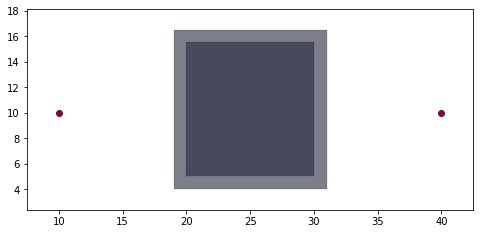

In [6]:
# Visualizing this map
vis_mapa(mapa_1)

In [7]:
from src.naboo.genetic import Genetic

# ===============================================================
# --------------   UTILIZE ESSE ESPAÇO --------------------------

debug = False

# Altere aqui o mapa que deseja utilizar
mapa = mapa_1
#mapa = mapa_2
#mapa = mapa_3
#mapa = mapa_4


# Inicialização do Algoritmo
ag = Genetic(Subject, mapa, 
        version = Version('beta', 'CC'),
        # Parâmetros da classe Genetic:
        taxa_cross=5,       # 5
        population_size=10, # 10
        C_d=10000,           # 1000
        C_obs=10000,        # 10000
        C_con=500,          # 500
        C_cur=100,          # 100
        C_t=100,            # 100
        max_exec_time=1, # segundos
        # Parâmetros da classe Subject:
        px0=mapa.origin.x,
        py0=mapa.origin.y,
        T_min=1,            # 1
        T_max=25,           # 25
        mutation_prob=0.7,  # 0.7
        gps_imprecision=1
)

# ===============================================================

# Execução do AG, retorna o melhor indivíduo
best = ag.run(info=True)

# Print do DNA do melhor
print('-'*30)
for dna in best.dna:
    print(dna)
    
# Print do DNA DECODIFICADO do melhor
print('-'*30)
for dna_decoded in best.dna_decoded:
    print(dna_decoded)
    
best = ag.best

# Visualização do Mapa usado, com a rota do melhor de todos
areas = [ area for area in itertools.chain(mapa.areas_n, mapa.areas_n_inf) ]
tipos = [ 'n' for _ in range(len(areas))]
plot_map(
    areas=areas,            # Mapa usado
    labels=tipos,            # Tipo do mapa {'n','p','b'} <- Não afeta o genético, só muda a visualização
    origem=mapa.origin,      # waypoint de origem
    destino=mapa.destination, # waypoint de destino
    waypoints=best.get_route(), # rota do melhor de todos
)


# Visualização de alguns gráficos de fitness e quantidade de Ts
#plot_stats(ag.trace, normalize=True)
#plot_stats(ag.trace, normalize=False)

NameError: name 'Genetic' is not defined

## Conclusion

A hybrid genetic algorithm for path planning problem with obstacle avoidance was introduced in this paper. The novelty is the combination of genetic algorithm with Ray Casting algorithm to avoid obstacles and to find safe regions for an emergency landing. The path planning and replanning system, based on the proposed hybrid method, was executed with a Raspberry PI that can be embedded on the UAV. The method returned trajectories without hit any obstacles for all simulations done. For path planning, more than 90\% of the trajectories reach the destination within the desired threshold, while a total of 84\% trajectories landed the aircraft in safety regions. A reasonable amount of feasible solutions is found for both scenarios in less than 40 sec. The method is not compared against related approaches such as those proposed by \cite{bow:2011,Arantes2016, daSilva2019collision} since these works solve linear models with exact approaches that do not run under Raspberry PI. As a future work, we will compare our approach against other planners for non-convex scenarios, based on methods such as A* or RRT. Also, we will evolve our hybrid GA to deal with 3D environments.

## Acknowledgment
Research developed using computational resources of Centro de Ciências Matemáticas Aplicadas à Indústria (CeMEAI) supported by Fundação de Amparo à Pesquisa do Estado de São Paulo (FAPESP) - CEPID-CeMEAI (FAPESP 2013/07375-0).


**References**